<a href="https://colab.research.google.com/github/puraminy/mini_proj2/blob/master/BAM3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
class BAM(object):
    def __init__(self, data):
        self.pairs = data
        m1 = len(self.pairs[0][1])
        m2 = len(self.pairs[0][0])
        # create weight matrix
        self.W = np.zeros((m2,m1))
        for p in self.pairs:
          X = p[0]
          Y = p[1]
          self.W += np.outer(X, Y)

    def get_assoc(self, A):
        A = np.asarray(A)
        y=np.dot(A.T,self.W)
        y[y<0]=-1
        y[y>=0]=1
        return y

  

import matplotlib.pyplot as plt

def print_formatted(row_list,col_list , mat):
  row_format ="{:>10}" * (len(col_list) + 1)
  print(row_format.format("", *col_list))
  for item, row in zip(row_list, mat):
      print(row_format.format(item, *row))

def draw_img(ax, X):
  ax.imshow(np.reshape(X,[5,3]))
  
def test_noise (inp, te_n, n_n): #inp:input vector te_n: number of noisy samples for test. n_n: number of noisy elements
  test = []
  for i in range(te_n):
    rnd = random.sample(range(len(inp)), n_n)
    noise = np.asarray(inp)
    for i in rnd:
      noise[i] = -1*noise[i]
    test.append(noise)

  test=np.asarray(test)
  test = np.unique(test,axis=0)

  return test


dict_keys(['A', 'C'])
Accuracy matrix: rows: distortion, columns: letters


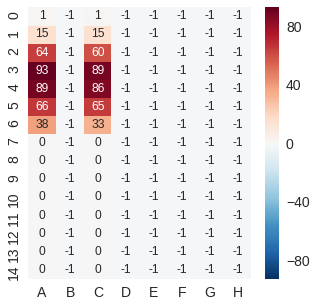

dict_keys(['A', 'B'])
Accuracy matrix: rows: distortion, columns: letters


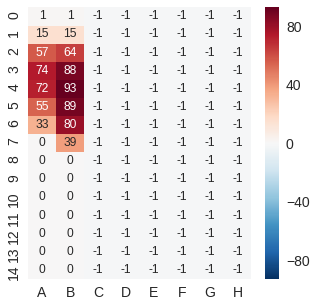

dict_keys(['E', 'D'])
Accuracy matrix: rows: distortion, columns: letters


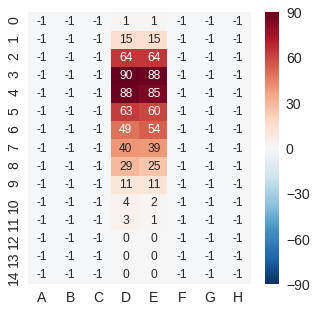

dict_keys(['D', 'C'])
Accuracy matrix: rows: distortion, columns: letters


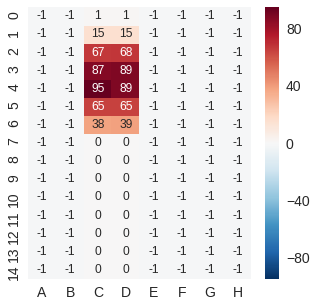

dict_keys(['A', 'B', 'C'])
Accuracy matrix: rows: distortion, columns: letters


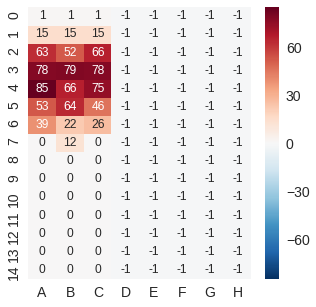

dict_keys(['F', 'C', 'H'])
Accuracy matrix: rows: distortion, columns: letters


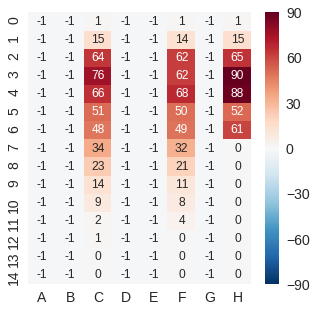

dict_keys(['A', 'B', 'C', 'D', 'E'])
Accuracy matrix: rows: distortion, columns: letters


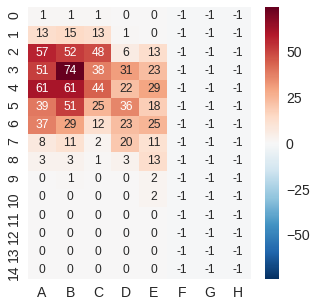

dict_keys(['A', 'B', 'C', 'D', 'E', 'F'])
Accuracy matrix: rows: distortion, columns: letters


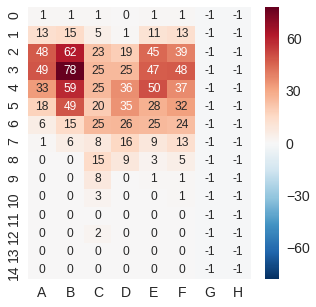

dict_keys(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])
Accuracy matrix: rows: distortion, columns: letters


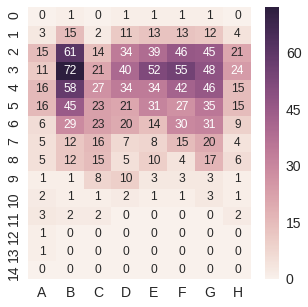

In [12]:
import numpy as np
import random

A = [-1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1]
tA = [-1, -1,-1] 
B = [1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1]
tB = [-1, -1, 1]
C = [-1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1]
tC = [-1,1,-1] 
D = [1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1]
tD = [-1,1,1]
E = [1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1]
tE = [1,-1,-1]
F =[1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1]
tF = [1, -1, 1]
G = [-1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1]
tG = [1, 1, -1]
H = [1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1]
tH = [1, 1, 1]

# tA = [-1, 1] 
# tC = [1, 1] 
letters ={"A" : A,"B" : B, "C" : C,"D":D, "E":E,"F":F,"G":G,"H":H}
targets ={"A" : tA,"B": tB, "C" : tC, "D" : tD, 
           "E" : tE,"F": tF, "G" : tG, "H" : tH}

# fig, axes = plt.subplots(2, 4)
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
# for i in range(4):
#   draw_img(axes[0,i], X[i])
#   xlabel = Y[i]; axes[0,i].set_xlabel(xlabel)
#   draw_img(axes[1,i], X[i+4]) 
#   xlabel = Y[i+4]; axes[1,i].set_xlabel(xlabel)

ds=[]

ds.append(dict((k, letters[k]) for k in ('A','C'))) #0
ds.append(dict((k, letters[k]) for k in ('A','B'))) 
ds.append(dict((k, letters[k]) for k in ('E','D'))) #2
ds.append(dict((k, letters[k]) for k in ('D','C')))
ds.append(dict((k, letters[k]) for k in ('A','B','C'))) #4
ds.append(dict((k, letters[k]) for k in ('F','C','H')))
ds.append(dict((k, letters[k]) for k in ('A','B','C','D','E')))
ds.append(dict((k, letters[k]) for k in ('A','B','C','D','E','F')))
ds.append(dict((k, letters[k]) for k in ('A','B','C','D','E','F','G','H'))) #8


let_list = [v for v in letters.keys()]


ds_index = 0

# ds = [ds[8]]

for data in ds:
  print("==========")
  print(data.keys())
  pairs = []

  for key,value in data.items():
    y = targets[key]
    pairs.append([value, y])

  bam = BAM(pairs)
  max_distort = 15
    
  acc_mat = np.full((max_distort, 8),-1)
 
 
  for distort in range(max_distort):
    for key,letter in data.items():
      target = targets[key]
      test_data=test_noise(letter, 100, distort)
      success = 0
      for i,noisy_data in enumerate(test_data):
        predicted = bam.get_assoc(noisy_data)
        if np.array_equal(target, predicted):
          success +=1

#       print(f"Accuracy of {key}= {success}")
      let_index = let_list.index(key)
      acc_mat[distort, let_index] = success

    ds_index+=1
  
  print("Accuracy matrix: rows: distortion, columns: letters")
#   print_formatted(range(len(ds)), let_list, acc_mat)
    # Visualizing of Hamming Distance
  import seaborn as sn
  import pandas  as pd

  df_hammY = pd.DataFrame(acc_mat, range(max_distort),range(len(let_list)))
  axlabels = range(max_distort)

  plt.figure(figsize = (5,5))
  sn.set(font_scale=1.4)#for label size
  sn.heatmap(df_hammY, annot=True,annot_kws={"size": 12}, xticklabels=let_list, yticklabels=axlabels)# font size
  plt.show()  
